In [1]:
#1. Install PyPDF2 and py-readability-metrics

In [2]:
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [3]:
#2. In a new notebook, import nltk and run the following commands

In [4]:
import nltk

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/jorge/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/jorge/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jorge/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
#3. Read the two news stories found in this assignment on Canvas. In a markdown cell in your
#   notebook, briefly characterize the issue at hand and your impressions from a news reporting
#   objectivity perspective

NEWS STORY IMPRESSIONS:

Reuters: The article explains about Harvard's Director corrections on her 1997 dissertaion. It runs in detail the specifics of the changes she made to her PHD dissertation along with how the Harvard Corporation checked the content for plagiarism. It also describes the pressure she has received after her congressional hearing.


Fox News: The article describes in detail the findings of Washington Free Beacon around the allegations of plagiarism of Harvard's Director. The article points at how the faculty is not screened with the same standard as the students. It also points to an apparently unrelated comment from NAACP's President defending Harvard's Director. 

In [9]:
#4. Use PyPDF2 to extract the text out of each document
from PyPDF2 import PdfReader

In [10]:
foxnews = PdfReader("data/foxnews.pdf")

In [11]:
reuters = PdfReader("data/reuters.pdf")

In [12]:
#4.a. Display the text

In [13]:
def extract_text(a):
    text = ""
    for page in a.pages:
        page_text = page.extract_text()
        if page_text:
            text += page_text   
    return text

In [14]:
foxnews_text = extract_text(foxnews)
foxnews_text

'1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit\nwith more plagiarism charges\nfoxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges\nMedia\nHarvard ‘received a complaint outlining over 40 allegations of\nplagiarism,’ according to the Free Beacon\n By Brian Flood  Fox News\nPublished December 20, 2023 12:59pm EST\nHarvard president facing 40 new allegations of plagiarism\nFox News\' Molly Line reports the latest on the allegations. \nEmbattled Harvard University President Claudine Gay  has been slapped with additional\ncharges of plagiarism. \nThe Washington Free Beacon  reported Harvard "received a complaint outlining over 40\nallegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard\'s\nresearch integrity of ficer, Stacey Springs, outlining the claims. \n"The document paints a picture of a pattern of misconduct more extensive than has been\npreviously reported and puts the Harvard Cor

In [15]:
reuters_text = extract_text(reuters)
reuters_text

'1 / 3Gabriella BorterHarvard president will submit dissertation edits after\nplagiarism allegations\nreuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21\nHarvard University President Claudine Gay testifies before a House Education and The\nWorkforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting\nAntisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken\nCedeno/File Photo Acquire Licensing Rights\nDec 21 (Reuters) - Harvard University\'s president was planning to submit three corrections to\nher 1997 dissertation after a committee investigating plagiarism allegations against her found\nthat she had made citation errors, a university spokesperson said.\nClaudine Gay , who was inaugurated as Harvard\'s president in September , has already\nsubmitted corrections to two published articles in recent weeks that were the focus of a\nreview by the Harvard Corporation, the university\

In [16]:
#4.b. Briefly note any anomalies in your notebook

There are several anomalies in these texts:
- Both texts include all line breaks as "\n"
- Both texts have unrelated characters with the article (i.e. Advertisements, Headers, etc.)
- Both texts have mispelling errors such as words separated or missing characters
- Both texts include random numeric characters
- Both texts include stopwords

In [17]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r"\w+")

In [18]:
#Tokenizing both reuters and foxnex articles
foxnews_tokens = tokenizer.tokenize(foxnews_text)
reuters_tokens = tokenizer.tokenize(reuters_text)

In [19]:
#Set everything in lowercase
foxnews_tokens = [token.lower() for token in foxnews_tokens]
reuters_tokens = [token.lower() for token in reuters_tokens]

In [20]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
foxnews_tokens = [token for token in foxnews_tokens if token not in stop_words]
reuters_tokens = [token for token in reuters_tokens if token not in stop_words]

In [21]:
#removing single or double character tokens 
foxnews_tokens = [token for token in foxnews_tokens if len(token) > 2]
reuters_tokens = [token for token in reuters_tokens if len(token) > 2]

In [22]:
#removing numbers in any characters in tokens
foxnews_tokens = [token for token in foxnews_tokens if not any(char.isdigit() for char in token)]
reuters_tokens = [token for token in reuters_tokens if not any(char.isdigit() for char in token)]

In [23]:
# Once reached this point I would ideally like to 
# check the spelling of these words and remove any misspelled word
# I've been unable to find a tool that does so.

In [24]:
#5. Use NLTK to complete sentiment analysis for each of the articles

In [25]:
foxnews_text_clean = ' '.join(foxnews_tokens)
reuters_text_clean = ' '.join(reuters_tokens)

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [27]:
sid.polarity_scores(foxnews_text_clean)

{'neg': 0.096, 'neu': 0.801, 'pos': 0.102, 'compound': 0.6673}

In [28]:
sid.polarity_scores(reuters_text_clean)

{'neg': 0.098, 'neu': 0.878, 'pos': 0.024, 'compound': -0.9735}

In [29]:
#a. Compare the results from the two articles

Looking at the compound values for both FoxNews and Reuters articles the conclusion would be that FoxNews article has a more positive value than Reuters article. 

In [30]:
#b. Compare the results to your reading of the articles; do you agree with the outcome?

I don't agree with this outcome, FoxNews article has a more negative approach to the issue and contains pretty strong negative words as "slap" or "dishonesty"

In [31]:
#6. Run sentiment analysis on the article headlines

In [32]:
# I've been unable to extract the tittle itself from the articles
# it is not accesible through the metadata of the file or any other way 

In [33]:
# The only way for me to access the title is to manually extract the tokens

In [34]:
foxnews_tokens[0:9]
foxnews_title_clean = ' '.join(foxnews_tokens[0:9])
foxnews_title_clean

'floodembattled harvard university president claudine gay hit plagiarism charges'

In [35]:
reuters_tokens[0:6]
reuters_title_clean = ' '.join(reuters_tokens[0:6])
reuters_title_clean

'borterharvard president submit dissertation edits plagiarism'

In [36]:
sid.polarity_scores(foxnews_title_clean)

{'neg': 0.208, 'neu': 0.792, 'pos': 0.0, 'compound': -0.2732}

In [37]:
sid.polarity_scores(reuters_title_clean)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [38]:
#a. Do those results agree with the overall sentiment?

The outcome of these sentiment analysis are more in line with my personal perception, showing a more negative compound value for FoxNews' article.

In [39]:
#7. Using py-readability-metrics complete 2-3 different readability scores

In [40]:
!pip install py-readability-metrics
!python -m nltk.downloader punkt

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to /Users/jorge/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
from readability import Readability

In [42]:
foxnews_text = Readability(foxnews_text)
reuters_text = Readability(reuters_text)

In [43]:
# The Gunning fog
foxnews_gf = foxnews_text.gunning_fog()
print(foxnews_gf.score)
print(foxnews_gf.grade_level)

21.868487077434633
college_graduate


In [44]:
reuters_gf = reuters_text.gunning_fog()
print(reuters_gf.score)
print(reuters_gf.grade_level)

19.59404318689501
college_graduate


In [45]:
# Reading Ease (flesch)
foxnews_f = foxnews_text.flesch()
print(foxnews_f.score)
print(foxnews_f.ease)
print(foxnews_f.grade_levels)

21.41115320671068
very_confusing
['college_graduate']


In [46]:
reuters_f = reuters_text.flesch()
print(reuters_f.score)
print(reuters_f.ease)
print(reuters_f.grade_levels)

16.550377619402184
very_confusing
['college_graduate']


In [47]:
# The Dale-Chall Formula
foxnews_dc = foxnews_text.dale_chall()
print(foxnews_dc.score)
print(foxnews_dc.grade_levels)

12.77964083329135
['college_graduate']


In [48]:
reuters_dc = reuters_text.dale_chall()
print(reuters_dc.score)
print(reuters_dc.grade_levels)

12.616721933836827
['college_graduate']


In [49]:
#a. Discuss what the chosen metric is measuring

The Gunning fog index measures the readability of English writing. The U.S. Department of Defense uses the Reading Ease (flesch) test as the standard test of readability for its documents and forms. The Dale-Chall Formula is an accurate readability formula for the simple reason that it is based on the use of familiar words, rather than syllable or letter counts.
My only concern with these metrics are whether the text that I provided is "clean" enough so that these readability modules can actually read the text, or the outcome I am receiving as a "complex" article is due to the actual mess of the text.  

In [50]:
#b. Compare the scores from both articles

The scores in general are pretty similar for both articles. The outcome for all of these is for a college graduate reader. I would highlight the outcome of Flesch analysis that shows the biggest different in score between both articles. Out of the scores extracted, Reuters article is in theory less readable than FoxNews article.

In [51]:
#8. Using wordcloud, create word clouds for both articles

In [52]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

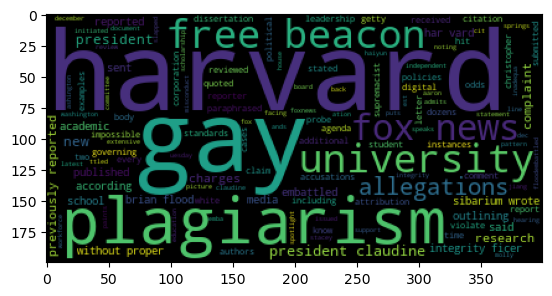

In [53]:
foxnews_wordcloud = WordCloud().generate(foxnews_text_clean)
plt.imshow(foxnews_wordcloud);

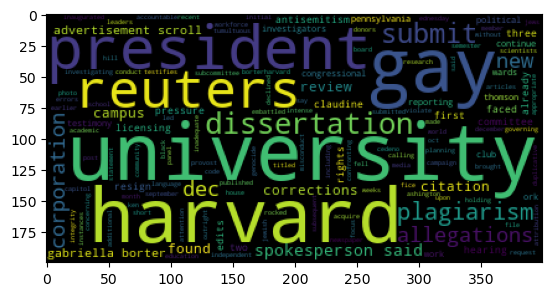

In [54]:
reuters_wordcloud = WordCloud().generate(reuters_text_clean)
plt.imshow(reuters_wordcloud);

In [55]:
#a. Briefly comment on the word clouds

Both word clouds are pretty similar, the common bigger words are "harvard" and "gay" . On the other hand, there are specifics for each article pointing to "FoxNews" and "Reuters". On the FoxNews there is a bigger importance of "plagiarism" or "Free Beacon" whilst on Reuters article "president" or "university" are more important. 